In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')
import statsmodels.api as sm


In [82]:
df = pd.read_csv(r'employee_retention.csv')
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09


In [24]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

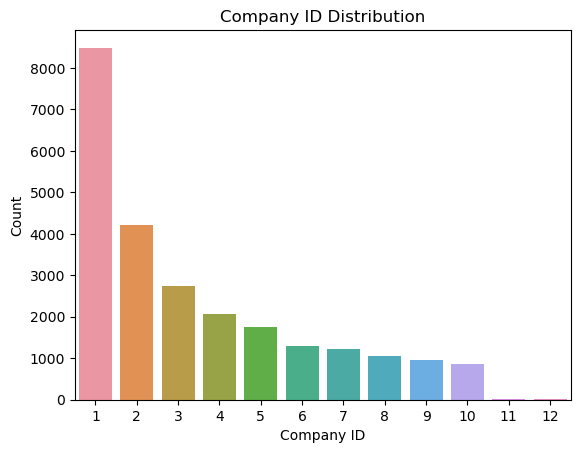

In [55]:
sns.countplot(df['company_id'])
plt.xlabel('Company ID')
plt.ylabel('Count')
plt.title('Company ID Distribution')
plt.show()

In [83]:
df = df[(df['company_id']<11)]

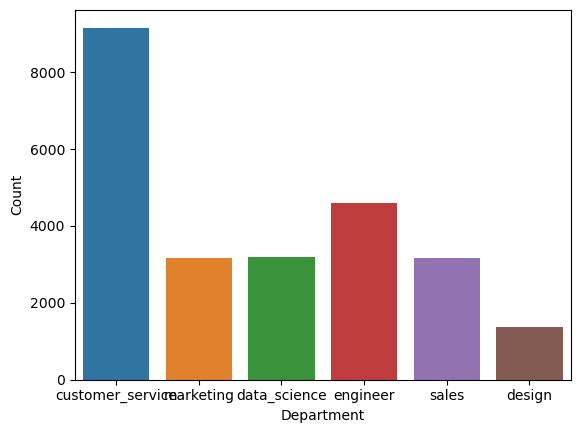

In [28]:
sns.countplot(df['dept'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

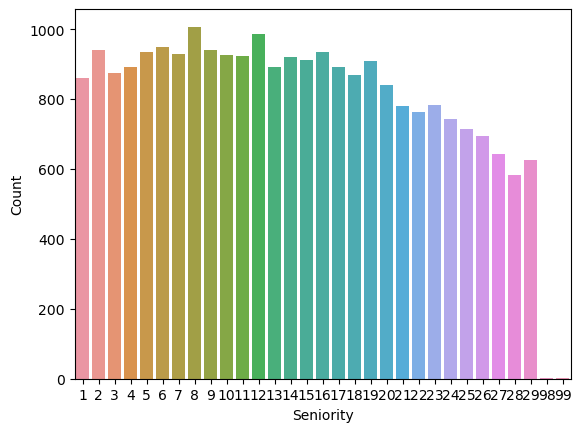

In [29]:
sns.countplot(df['seniority'])
plt.xlabel('Seniority')
plt.ylabel('Count')
plt.show()

In [84]:
df = df[(df['seniority']<97)]

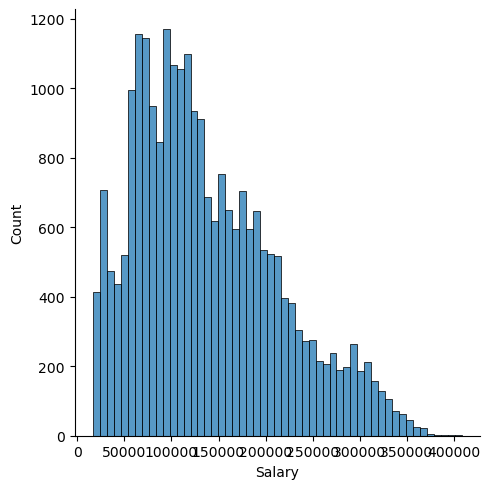

In [31]:
sns.displot(df['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [85]:
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

df['join_y'], df['join_m'], df['join_d'] = df['join_date'].dt.year, df['join_date'].dt.month, df['join_date'].dt.day
df['quit_y'], df['quit_m'], df['quit_d'] = df['quit_date'].dt.year, df['quit_date'].dt.month, df['quit_date'].dt.day
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_y,join_m,join_d,quit_y,quit_m,quit_d
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014,3,24,2015.0,10.0,30.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013,4,29,2014.0,4.0,4.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2014,10,13,NaN,NaN,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012,5,14,2013.0,6.0,7.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011,10,17,2014.0,8.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,2012,5,1,2015.0,6.0,26.0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,2012,1,26,2013.0,2.0,1.0
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,2015,2,18,NaN,NaN,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,2015,10,26,NaN,NaN,NaN


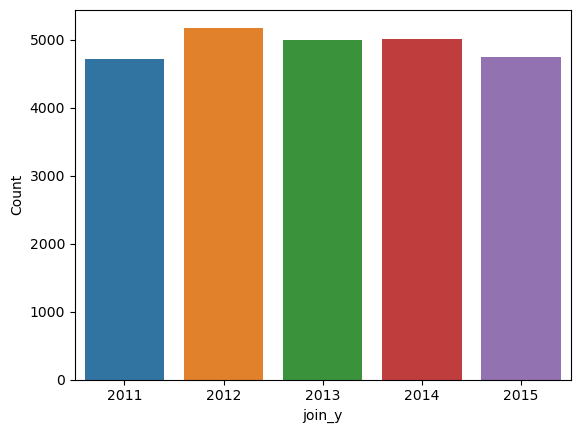

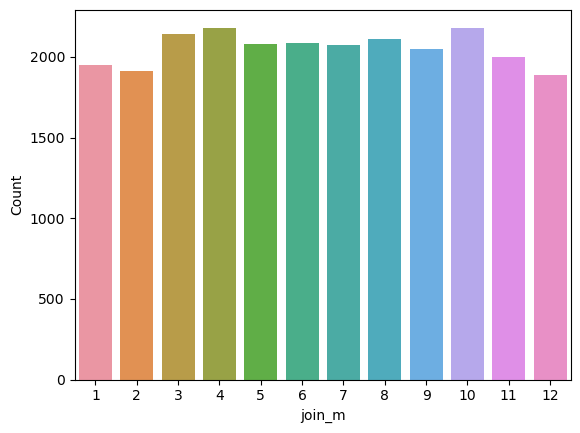

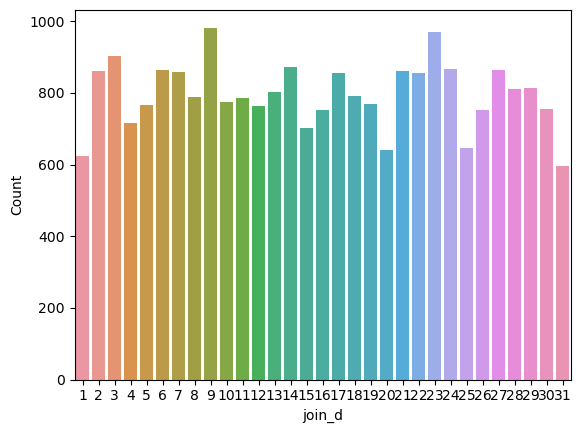

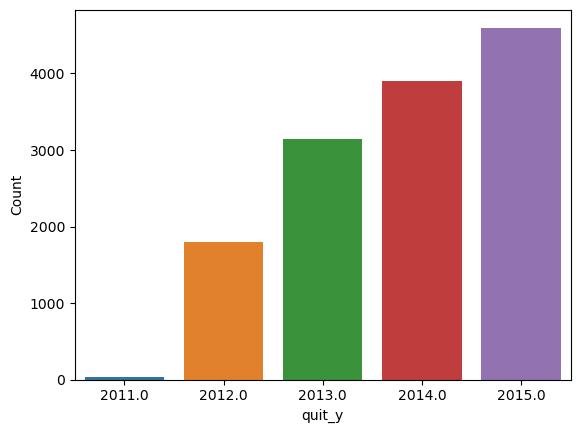

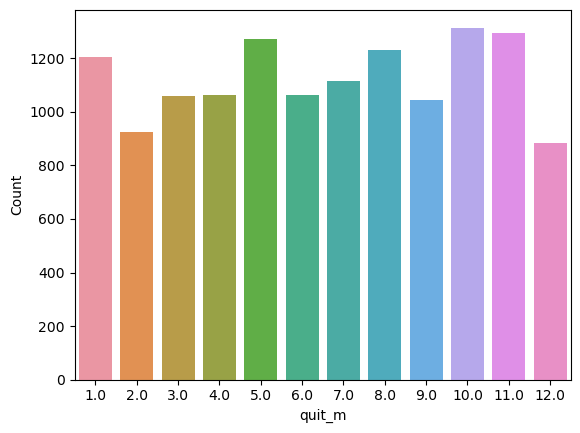

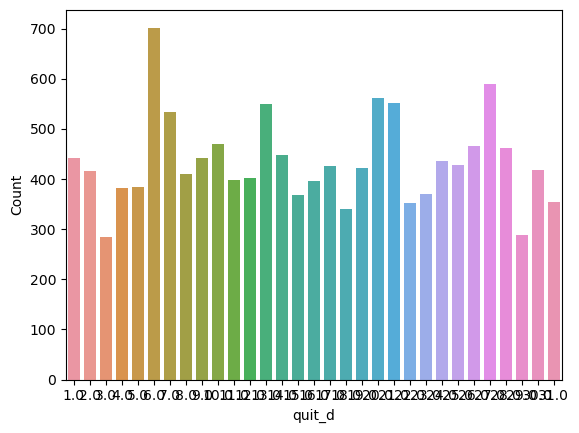

In [33]:
date_plot = ('join_y','join_m','join_d','quit_y','quit_m','quit_d')
for i in date_plot:
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [34]:
date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
company = sorted(df['company_id'].unique())
headcount=[]
d=[]
c=[]

for i in date:
    for j in company:
        join = len(df[(df['join_date']<=i)&(df['company_id']==j)])
        quit = len(df[(df['quit_date']<=i)&(df['company_id']==j)])
        d.append(i)
        c.append(j)
        headcount.append(join-quit)
        
q1 = pd.DataFrame({'day': d, 'company_id': c, 'employee_headcount': headcount}, columns=['day', 'company_id', 'employee_headcount'])
q1

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
17845,2015-12-13,6,579
17846,2015-12-13,7,532
17847,2015-12-13,8,468
17848,2015-12-13,9,432


<AxesSubplot:xlabel='day'>

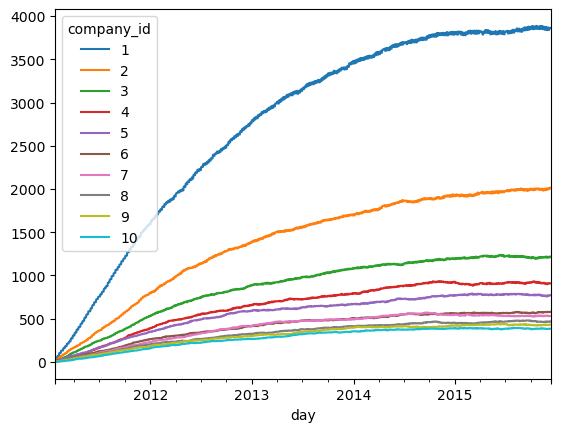

In [35]:
plot = q1
plot = plot.pivot(index='day', columns='company_id', values='employee_headcount')
plot.plot()

In [86]:
df = df.merge(q1,how='left',left_on=('company_id','quit_date'), right_on=('company_id','day'))
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_y,join_m,join_d,quit_y,quit_m,quit_d,day,employee_headcount
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014,3,24,2015.0,10.0,30.0,2015-10-30,532.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013,4,29,2014.0,4.0,4.0,2014-04-04,523.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2014,10,13,NaN,NaN,NaN,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012,5,14,2013.0,6.0,7.0,2013-06-07,468.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011,10,17,2014.0,8.0,22.0,2014-08-22,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24655,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,2012,5,1,2015.0,6.0,26.0,2015-06-26,3789.0
24656,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,2012,1,26,2013.0,2.0,1.0,2013-02-01,425.0
24657,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,2015,2,18,NaN,NaN,NaN,NaT,NaN
24658,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,2015,10,26,NaN,NaN,NaN,NaT,NaN


In [87]:
df['retention'] = df['employee_headcount'].apply(lambda x: 1 if pd.isnull(x) else 0)
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_y,join_m,join_d,quit_y,quit_m,quit_d,day,employee_headcount,retention
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014,3,24,2015.0,10.0,30.0,2015-10-30,532.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013,4,29,2014.0,4.0,4.0,2014-04-04,523.0,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2014,10,13,NaN,NaN,NaN,NaT,NaN,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012,5,14,2013.0,6.0,7.0,2013-06-07,468.0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011,10,17,2014.0,8.0,22.0,2014-08-22,1855.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24655,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,2012,5,1,2015.0,6.0,26.0,2015-06-26,3789.0,0
24656,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,2012,1,26,2013.0,2.0,1.0,2013-02-01,425.0,0
24657,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,2015,2,18,NaN,NaN,NaN,NaT,NaN,1
24658,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,2015,10,26,NaN,NaN,NaN,NaT,NaN,1


In [39]:
key = df['employee_id']
df=df.drop(['employee_id','join_date','quit_date','join_d','join_m','join_d','quit_m','quit_d','quit_y','day','employee_headcount'],axis=1)
df

,company_id,dept,seniority,salary,join_y,retention
0,7,customer_service,28,89000.0,2014,False
1,7,marketing,20,183000.0,2013,False
2,4,marketing,14,101000.0,2014,True
3,7,customer_service,20,115000.0,2012,False
4,2,data_science,23,276000.0,2011,False
...,...,...,...,...,...,...
24655,1,data_science,5,172000.0,2012,False
24656,6,marketing,7,88000.0,2012,False
24657,3,customer_service,16,97000.0,2015,True
24658,4,engineer,10,160000.0,2015,True


In [40]:
df['join_y']=df['join_y'].astype(object)
df['company_id']=df['company_id'].astype(object)

df=pd.get_dummies(df)
df

,seniority,salary,retention,company_id_1,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,company_id_7,...,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales,join_y_2011,join_y_2012,join_y_2013,join_y_2014,join_y_2015
0,28,89000.0,False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,20,183000.0,False,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,14,101000.0,True,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,20,115000.0,False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,23,276000.0,False,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24655,5,172000.0,False,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
24656,7,88000.0,False,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
24657,16,97000.0,True,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24658,10,160000.0,True,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [42]:
#normalization
num_data = df[["seniority","salary"]]
scaler = MinMaxScaler(feature_range=(0, 1)).fit(num_data)
scaled_data = scaler.transform(num_data)
scaled_df = pd.DataFrame(scaled_data, columns=["seniority","salary"])
scaled_df = scaled_df.reset_index(drop=True)
scaled_df.head()

,seniority,salary
0,0.964286,0.184143
1,0.678571,0.424552
2,0.464286,0.214834
3,0.678571,0.250639
4,0.785714,0.662404


In [47]:
X,y=df.drop('retention',axis=1),df['retention']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17262, 23) (7398, 23) (17262,) (7398,)


In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
s = rf.score(X_test,y_test)
print(s)

0.7446607191132738


In [49]:
importances=rf.feature_importances_
indices=np.argsort(importances[::-1])

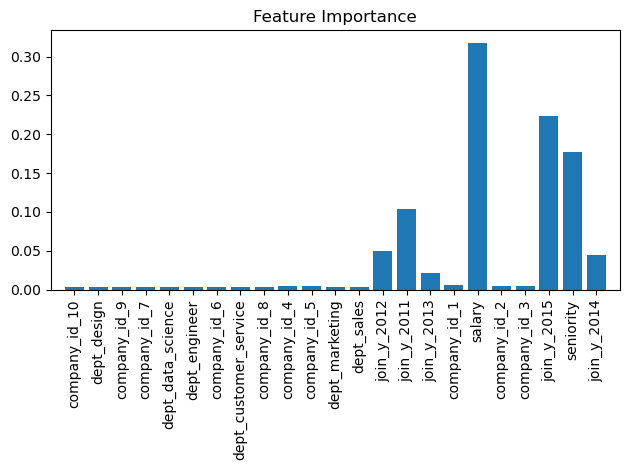

In [50]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),X.columns[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [51]:
perm_importance = permutation_importance(rf, X_test, y_test)

for i in perm_importance.importances_mean.argsort()[::-1]:
    if perm_importance.importances_mean[i] - 2 * perm_importance.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<8}"
               f"{perm_importance.importances_mean[i]:.3f}"
               f" +/- {perm_importance.importances_std[i]:.3f}")

join_y_20150.167 +/- 0.004
join_y_20110.034 +/- 0.002
join_y_20140.030 +/- 0.002
join_y_20120.008 +/- 0.002


In [ ]:
churn = salary[(salary['retention']==False)]
churn.describe()

In [ ]:
non = salary[(salary['retention']==True)]
non.describe()

In [ ]:
在職多久會離職